In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
os.getcwd()
os.chdir('/Volumes/JosephBSR/Ben_BSR_all')

In [6]:
TotalConcatenated = pd.read_csv('baseline_output.csv')

In [14]:
print(TotalConcatenated.shape)
print(TotalConcatenated.head())

(1442158, 20)
   Unnamed: 0  time_bin  worm   time   speed      x      y  angularspeed  \
0           0       4.0   166  3.959  0.1877  24.45  24.12          9.70   
1           1       4.0   242  3.715  0.2145  31.42  36.22         24.75   
2           2       4.0   243  3.803  0.3030  31.27  37.90         17.75   
3           3       4.0   370  3.785  0.2279  21.31  28.89         32.56   
4           4       4.0   462  3.863  0.2375  21.34  34.94          1.20   

   pathlength   kink  bias  curve  dir     crab  length  midline   width  \
0     0.02400  49.30   1.0  33.80  0.0  0.00420  0.9326    1.055  0.2241   
1     0.06700  74.44   1.0  33.16  0.0  0.04553  0.8833    1.083  0.2542   
2     0.06300  48.25   1.0  31.10  0.0  0.03710  0.8670    1.075  0.2340   
3     0.05680  19.78   1.0  33.97  0.0  0.03903  0.8140    0.973  0.2203   
4     0.04565  44.22   1.0  38.34  0.0  0.00857  0.8057    1.011  0.1313   

   morphwidth     area      Strain  
0     0.16750  0.14870  N2_OffFood 

# 8.2 Speed Trace Plot

In [ ]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        'green',
                        'lightgreen',
                        'royalblue',
                        'lightblue',
#                         '#FFB5C5',
#                         '#CD6889'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [23]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'].unique())
speed_diff.reset_index(drop=True)
# print(speed_diff)
# print(speed_diff.iloc[0,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[0,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

           Genotype     speed     Score
4      cat-2(e1112)  0.026952 -0.057929
16   rskd-1(tm4031)  0.046121 -0.038760
18    sac-2(ok2743)  0.059843 -0.025038
20    set-2(ok1484)  0.066316 -0.018565
12   igcm-2(ok1527)  0.067801 -0.017080
8     gba-4(tm3314)  0.076095 -0.008786
14   lfe-2(tm14109)  0.078571 -0.006310
0                N2  0.084881  0.000000
2   R07G3.8(tm5683)  0.087549  0.002668
10   hipr-1(ok1081)  0.097154  0.012273
6     gba-2(tm4623)  0.098493  0.013613


<ipython-input-23-329d0d97d736>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


In [26]:
# print(speed_diff.iloc[0,1])

In [27]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

                     Strain Treatment         Genotype     speed  new
0                N2_OffFood   OffFood               N2  0.184379    1
1                 N2_OnFood    OnFood               N2  0.099498    2
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  0.162167    3
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  0.074619    4
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  0.206655    0
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  0.179703    6
6     gba-2(tm4623)_OffFood   OffFood    gba-2(tm4623)  0.165796    7
7      gba-2(tm4623)_OnFood    OnFood    gba-2(tm4623)  0.067302    8
8     gba-4(tm3314)_OffFood   OffFood    gba-4(tm3314)  0.134118    9
9      gba-4(tm3314)_OnFood    OnFood    gba-4(tm3314)  0.058023   10
10   hipr-1(ok1081)_OffFood   OffFood   hipr-1(ok1081)  0.183672   11
11    hipr-1(ok1081)_OnFood    OnFood   hipr-1(ok1081)  0.086518   12
12   igcm-2(ok1527)_OffFood   OffFood   igcm-2(ok1527)  0.169181   13
13    igcm-2(ok1527)

## Making the bar plot

<Figure size 432x288 with 0 Axes>

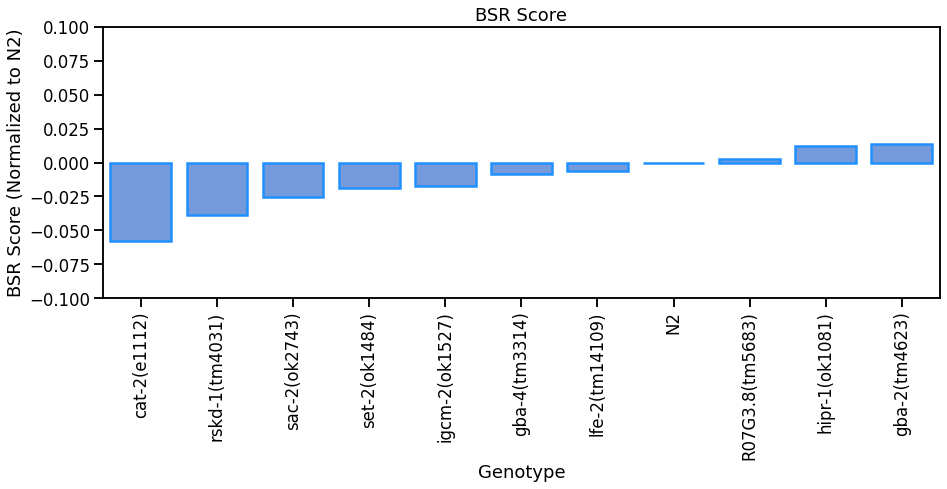

In [28]:
Title = "BSR Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = speed_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.1)
plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Generic differences of differences script

<ipython-input-35-074c7914e334>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


           Genotype  pathlength     Score
10   hipr-1(ok1081)   -5.930353 -4.320391
18    sac-2(ok2743)   -4.854384 -3.244422
12   igcm-2(ok1527)   -2.764352 -1.154390
14   lfe-2(tm14109)   -2.447395 -0.837432
16   rskd-1(tm4031)   -1.854376 -0.244414
4      cat-2(e1112)   -1.610417 -0.000455
0                N2   -1.609962  0.000000
20    set-2(ok1484)   -1.420299  0.189663
8     gba-4(tm3314)   -1.057919  0.552044
2   R07G3.8(tm5683)   -1.044947  0.565015
6     gba-2(tm4623)   -0.668445  0.941517
                     Strain Treatment         Genotype  pathlength  new
0                N2_OffFood   OffFood               N2    5.640673    1
1                 N2_OnFood    OnFood               N2    7.250635    2
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)    3.748396    3
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)    4.793344    4
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)    4.054211    0
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)    5.6646

<Figure size 432x288 with 0 Axes>

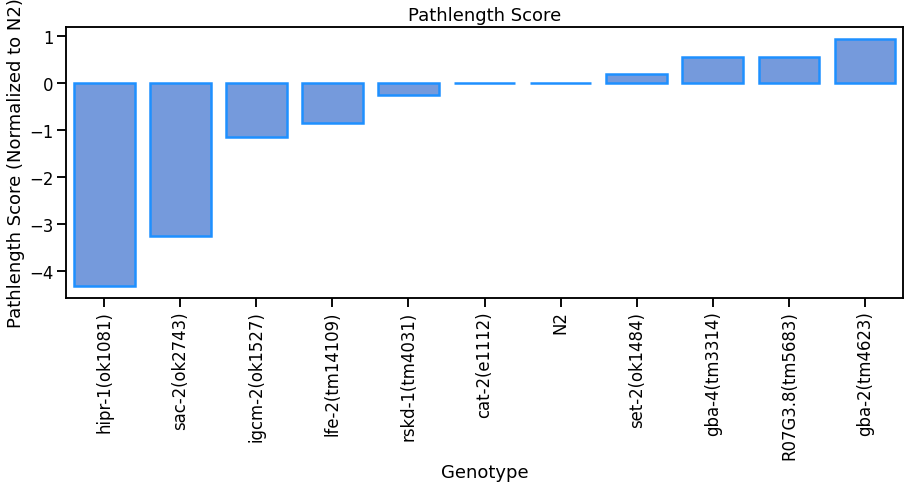

In [35]:
parameter = 'pathlength'

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_parameter)

# avg_parameter.to_csv("avg_parameter.csv")

parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
parameter_diff.reset_index(drop=True)
# print(parameter_diff)
# print(parameter_diff.iloc[0,1])
parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
parameter_diff = parameter_diff.sort_values(by = ["Score"])
print(parameter_diff)

#################

# print(parameter_diff.iloc[0,1])

#################

avg_parameter["new"] = range(1,len(avg_parameter)+1)
avg_parameter.loc[avg_parameter.index==4, 'new'] = 0
avg_parameter.loc[avg_parameter.index==4, 'new'] = 0
print(avg_parameter)
# avg_parameter.sort_values("new").drop('new', axis=1)

#################

Title = f"{parameter.capitalize()} Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = parameter_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel(f"{parameter.capitalize()} Score (Normalized to N2)")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [26]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

ValueError: Columns must be same length as key

In [27]:
# Test Cell
# chunkeddata_mean

In [28]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

ValueError: Could not interpret input 'Genotype'

<Figure size 432x288 with 0 Axes>

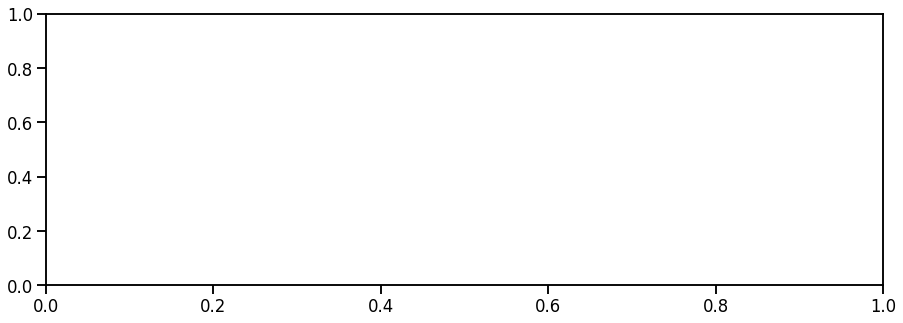

In [29]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT = AfterOneHundredMean[AfterOneHundredMean.Genotype != "Test"]
AfterOneHundredTEST = AfterOneHundredMean[AfterOneHundredMean.Genotype != "cat-2 (e1112)"]


In [ ]:
print(AfterOneHundredMean)
print(AfterOneHundredCAT)
print(AfterOneHundredTEST)

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)